In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

In [29]:
# load dataset
data = fetch_california_housing(as_frame=True)
# california frame is a pandas DataFrame that includes both features and target

df = data.frame.copy()
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [32]:
#define target and feature columns
target_col = "MedHouseVal"
feature_cols = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]

X = df[feature_cols]
y = df[target_col]
print(X.shape, y.shape)
print(X.head())
print(y.head())

(20640, 8) (20640,)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [33]:
correlation_matrix = df[feature_cols + [target_col]].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedr

Text(0.5, 1.0, 'Feature Correlation Matrix')

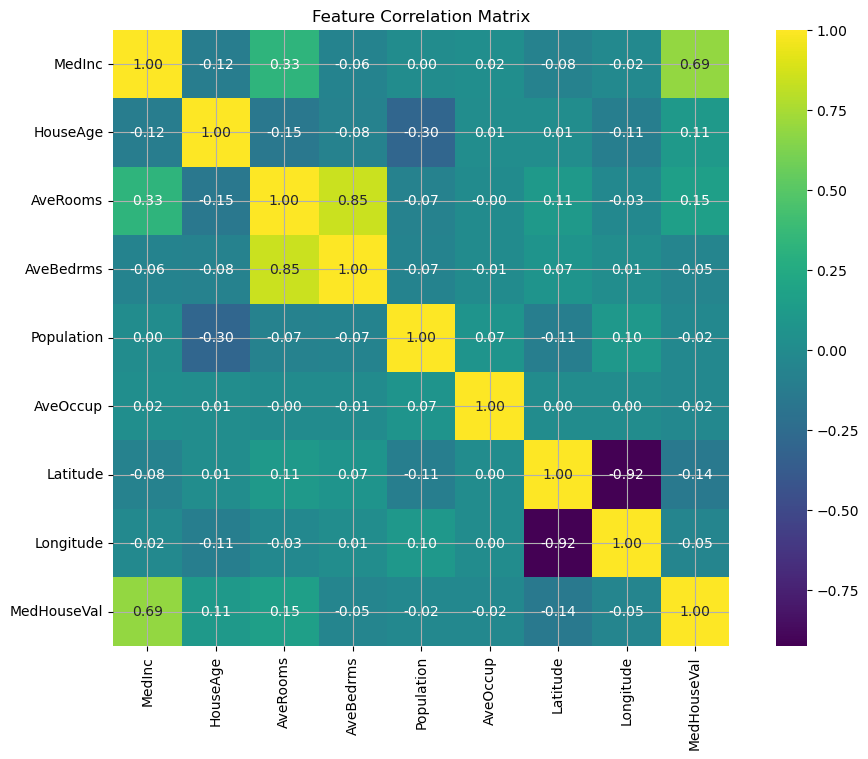

In [34]:
#plotting correlation heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", square=True)
plt.title("Feature Correlation Matrix")

In [35]:
#step 3: split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [37]:
# .fit the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model fitted successfully.")

Model fitted successfully.


In [38]:
print("Intercept (bias term)", model.intercept_)
print("Coefficients:")
for feature, coef in zip(feature_cols, model.coef_):
    print(f"  {feature}: {coef}")


Intercept (bias term) -37.02327770606405
Coefficients:
  MedInc: 0.4486749096657176
  HouseAge: 0.009724257517905023
  AveRooms: -0.12332334282795863
  AveBedrms: 0.7831449067929727
  Population: -2.0296205801885327e-06
  AveOccup: -0.00352631848713407
  Latitude: -0.41979248658835966
  Longitude: -0.43370806496398745


In [39]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Predictions made successfully.")
print("First 5 predictions on test set:", y_test_pred[:5])
print("First 5 actual values on test set:", y_test.values[:5])

Predictions made successfully.
First 5 predictions on test set: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
First 5 actual values on test set: [0.477   0.458   5.00001 2.186   2.78   ]


In [41]:
# step 5: define a helper function to calculate metrics
from cProfile import label


def calculate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2 ): {r2:.4f}")
    
# evaluate on training data
print("Training Set Evaluation:")
calculate_regression_metrics(y_train, y_train_pred)
# evaluate on test data
print("\nTest Set Evaluation:")
calculate_regression_metrics(y_test, y_test_pred)


Training Set Evaluation:
Mean Squared Error (MSE): 0.5179
Root Mean Squared Error (RMSE): 0.7197
Mean Absolute Error (MAE): 0.5286
R-squared (R2 ): 0.6126

Test Set Evaluation:
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R-squared (R2 ): 0.5758
